<h1 style="text-align:center">Data Science</h1>
<p style="text-align:center"> CSL 487</p>

<h2 style="text-align:center">Project Data Wrangling</h2>






<br><br><br>




<table style="width:100%; text-align:center;">
  <tr>
    <th>Student Name</th>
    <th>Enrolment No</th>
    <th>Class and Section</th>
  </tr>
  <tr>
    <td>M Arslan Shaukat</td>
    <td>01-134211-053</td>
    <td>BSCS 6A</td>
  </tr>
  <tr>
    <td>Urooj Tariq</td>
    <td>01-134211-097</td>
    <td>BSCS 6A</td>
  </tr>
  <tr>
    <td>Javaria Yaqoob</td>
    <td>01-134211-035</td>
    <td>BSCS 6A</td>
  </tr>
</table>







<br>
<br>
<br>


<h4 style="text-align:center">Department of Computer Science</h4>
<h4 style="text-align:center">BAHRIA UNIVERSITY, ISLAMABAD</h4>
<p style="page-break-after:always;"></p>


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [55]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [56]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [57]:
df.shape

(2200, 8)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [59]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [60]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [61]:
df.duplicated().sum()

0

In [62]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [63]:
df.iloc[:,0:-1]

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


### Data Visualization

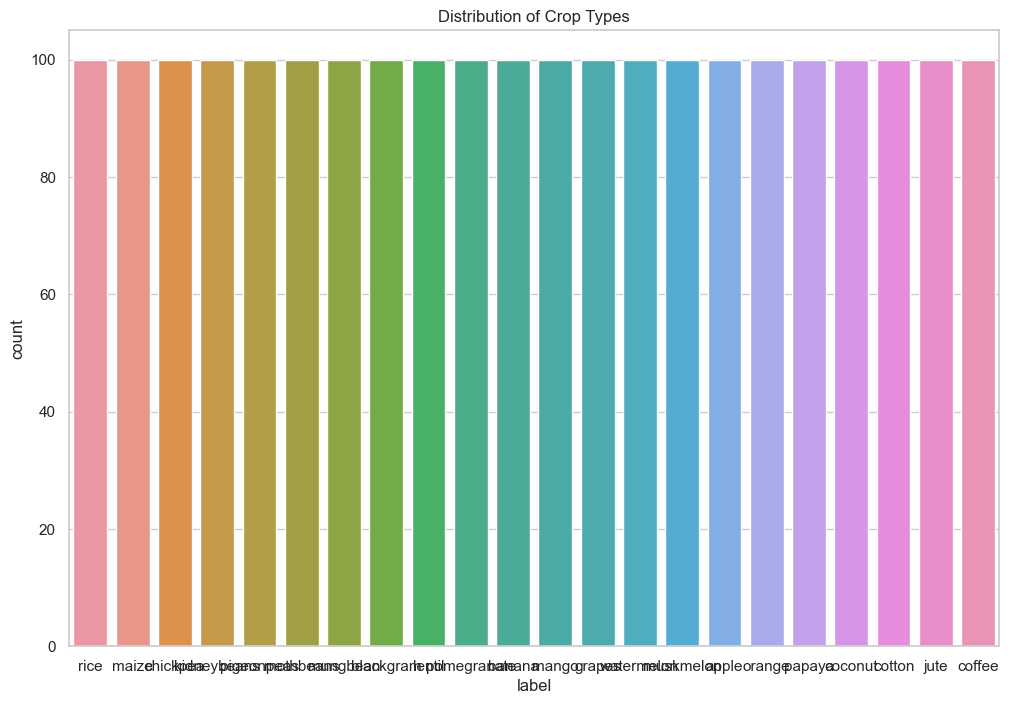

In [76]:
plt.figure(figsize=(12, 8))
sns.countplot(x='label', data=df)
plt.title('Distribution of Crop Types')
plt.show()

C:\Users\arsla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


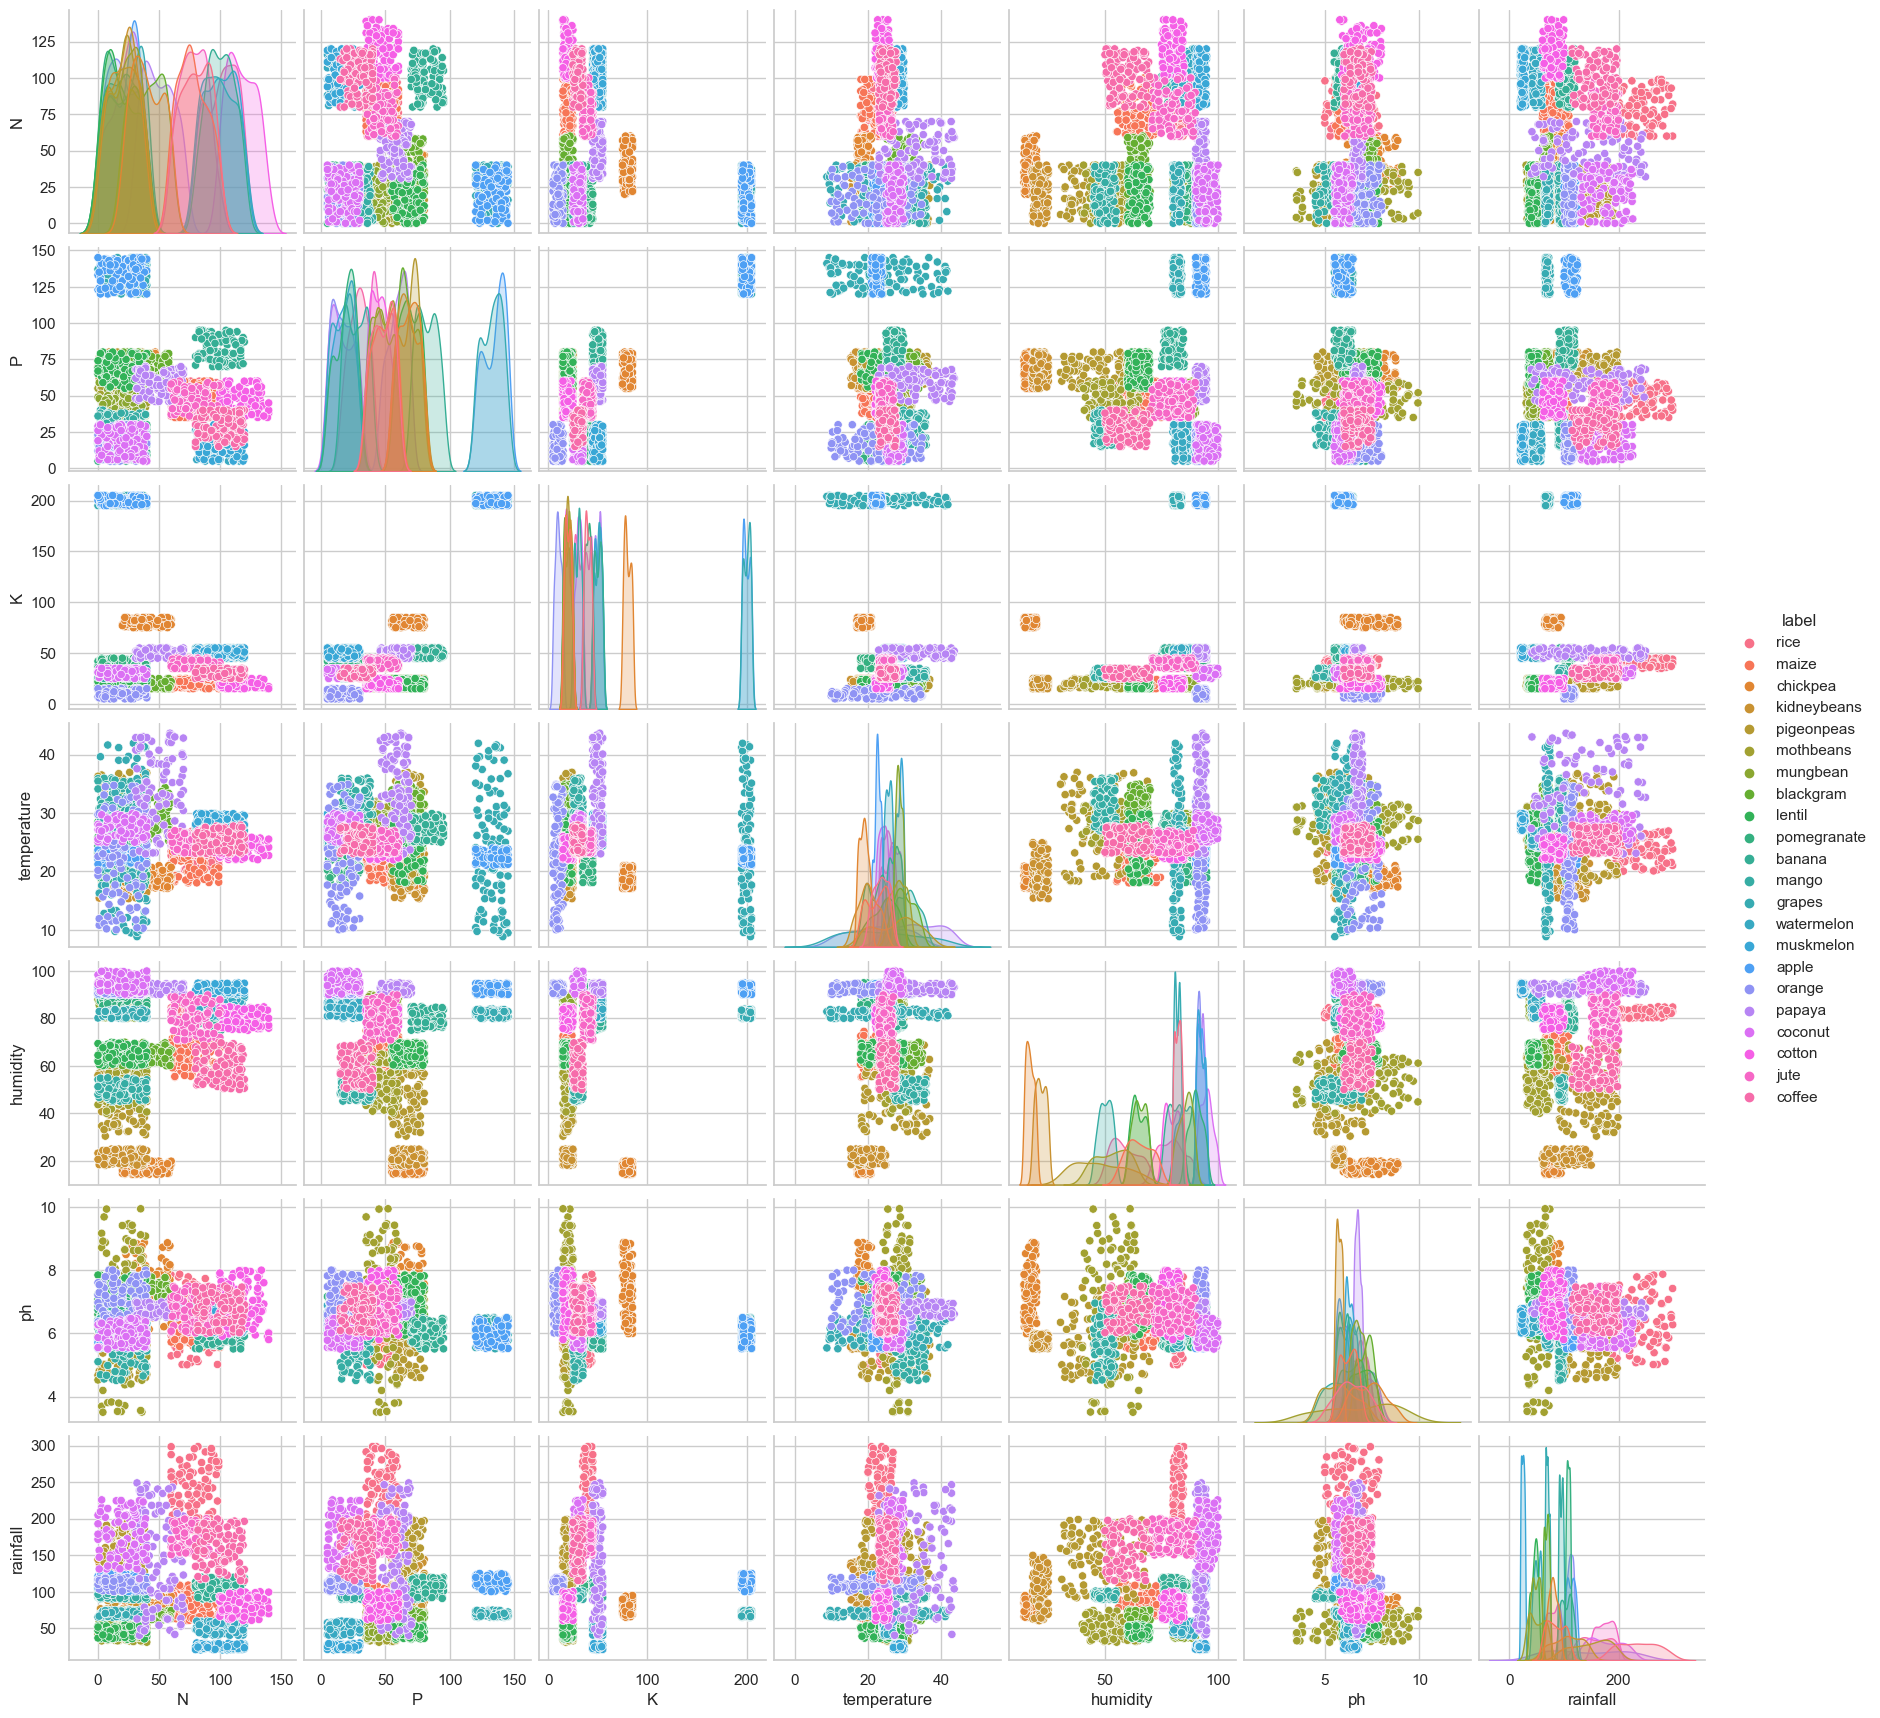

In [65]:
sns.pairplot(df, hue='label', diag_kind='kde')
plt.show()


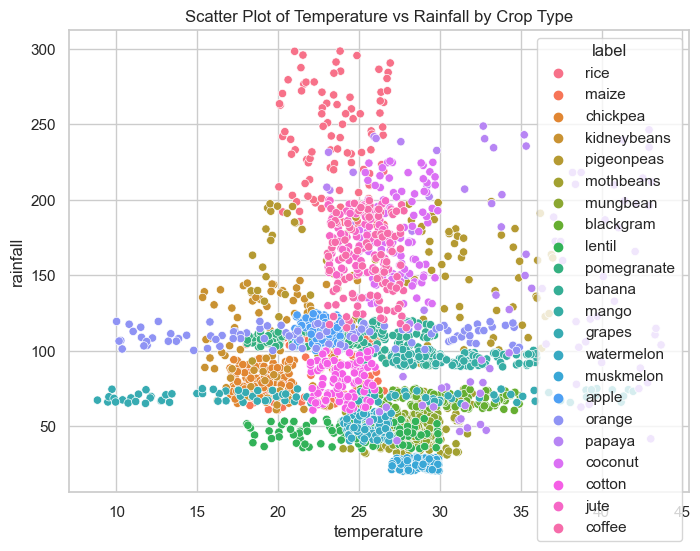

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='label', data=df)
plt.title('Scatter Plot of Temperature vs Rainfall by Crop Type')
plt.show()

### DEALING WITH OUTLIERS

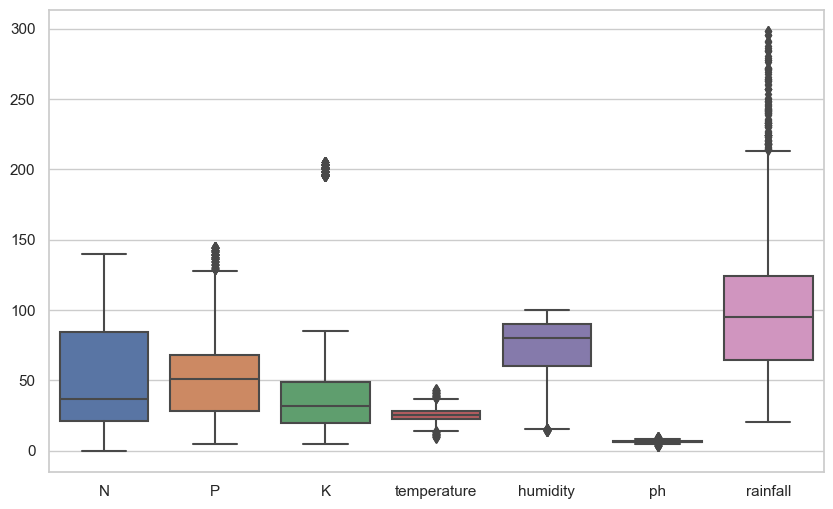

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

In [67]:
#Finding Outliers in dataset
from scipy.stats import zscore

z_scores = zscore(df.iloc[:,:-1])

#threshold for outlier detection
threshold = 3

#Indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

#Rows with outliers
outliers = df[outlier_indices]
outliers

,N,P,K,temperature,humidity,ph,rainfall,label
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
12,78,58,44,26.800796,80.886848,5.108682,284.436457,rice
16,85,38,41,21.587118,82.788371,6.249051,276.655246,rice
19,88,35,40,23.579436,83.587603,5.853932,291.298662,rice
26,97,59,43,26.359272,84.044036,6.286500,271.358614,rice
...,...,...,...,...,...,...,...,...
1758,40,49,47,42.933686,91.175675,6.501521,246.361327,papaya
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1766,63,58,50,43.037143,94.642890,6.720744,41.585659,papaya
1778,35,68,45,42.936054,90.094481,6.612430,234.846611,papaya


In [68]:
#outliers using IQR method
data_no_label=df.iloc[:,:-1]
median = data_no_label.median()
Q1 = data_no_label.quantile(0.25)
Q3 = data_no_label.quantile(0.75)
IQR = Q3 - Q1

outlier_indices_iqr = ((data_no_label < (Q1 - 1.5 * IQR)) | (data_no_label > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_indices_iqr
outlier_indices_iqr.sum()

432

zscore give 155 outliers and IQR gives 432 outliers. The no of outliers is too large so another we have to find another way of handling outliers. 

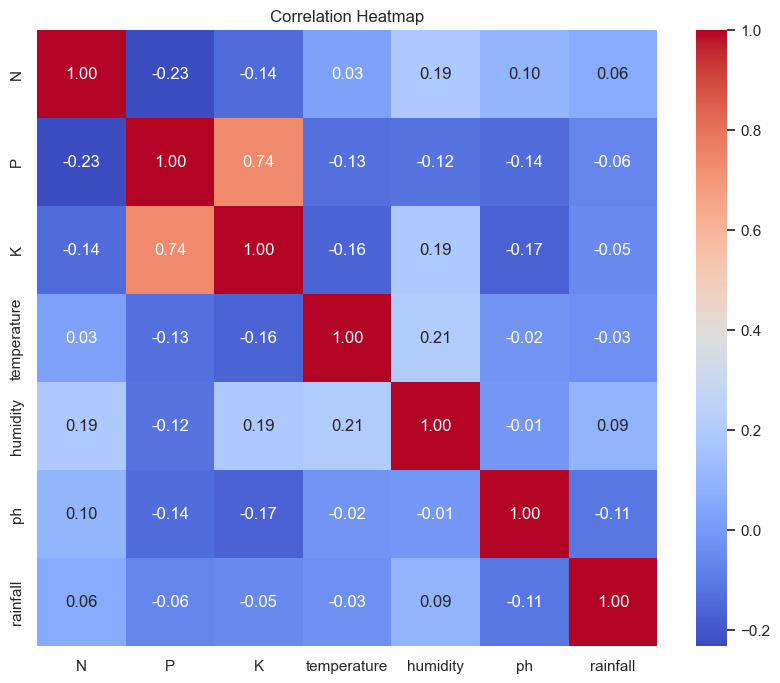

In [69]:
correlation_matrix = df.iloc[:,:-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Strong positive correlations:

Temperature and humidity: This makes sense, as warmer temperatures typically lead to higher humidity levels. The correlation coefficient of 0.74 in the heatmap indicates a strong positive linear relationship.

Potassium and pH: This suggests that higher levels of potassium are associated with higher pH levels. The correlation coefficient of 0.60 is moderately strong.

#### Strong negative correlations:

Temperature and rainfall: This is likely because warmer temperatures often lead to drier conditions and less rainfall. The correlation coefficient of -0.40 indicates a moderate negative relationship.

Humidity and rainfall: Similar to the temperature-rainfall relationship, higher humidity levels are often associated with lower rainfall amounts. The correlation coefficient of -0.23 is a weak to moderate negative relationship.

#### Weak or no correlations:

pH and rainfall: There appears to be little to no linear relationship between pH and rainfall in this dataset. The correlation coefficient of 0.03 is close to zero.

Potassium and rainfall: Similar to pH and rainfall, there seems to be no significant linear relationship between potassium and rainfall. The correlation coefficient of -0.05 is very close to zero.


### Converting Categorical varibales to a integer format

In [70]:
# using get_dummies method
df_encoded = pd.get_dummies(df, columns=['label'], prefix='label')

print(df_encoded.head())

    N   P   K  temperature   humidity        ph    rainfall  label_apple  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536        False   
1  85  58  41    21.770462  80.319644  7.038096  226.655537        False   
2  60  55  44    23.004459  82.320763  7.840207  263.964248        False   
3  74  35  40    26.491096  80.158363  6.980401  242.864034        False   
4  78  42  42    20.130175  81.604873  7.628473  262.717340        False   

   label_banana  label_blackgram  ...  label_mango  label_mothbeans  \
0         False            False  ...        False            False   
1         False            False  ...        False            False   
2         False            False  ...        False            False   
3         False            False  ...        False            False   
4         False            False  ...        False            False   

   label_mungbean  label_muskmelon  label_orange  label_papaya  \
0           False            False         False  

In [71]:
crop_dict = { 
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=df['label'].map(crop_dict)

In [72]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [73]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [74]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
